In [5]:
import pandas as pd #To hand with data 
import numpy as np #To math 
import seaborn as sns #to visualization
import matplotlib.pyplot as plt # to plot the graphs
import matplotlib.gridspec as gridspec # to do the grid of plots

In [6]:
#loading the data
df_credit = pd.read_csv("..\dataset\creditcard.zip")

In [7]:
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
#looking the type and searching for null values
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

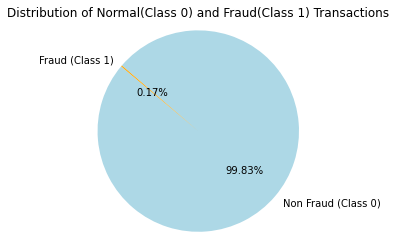

In [9]:

class_counts = df_credit["Class"].value_counts()
# Define labels and colors
labels = ['Non Fraud (Class 0)', 'Fraud (Class 1)']
colors = ['lightblue', 'orange']

# Create pie chart
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.title("Distribution of Normal(Class 0) and Fraud(Class 1) Transactions")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [10]:
# Define a function to convert time in seconds to minutes and hours
def convert_time(seconds):
    minutes = seconds // 60
    hours = minutes // 60
    return minutes % 60, hours % 24

# Create empty lists to store the converted values
time_min_values = []
time_hour_values = []

# Apply the conversion function to each time value in the dataframe
for time_sec in df_credit['Time']:
    minutes, hours = convert_time(time_sec)
    time_min_values.append(minutes)
    time_hour_values.append(hours)

# Add the converted values as new columns to the DataFrame
df_credit['Time_min'] = time_min_values
df_credit['Time_hour'] = time_hour_values

In [11]:
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_min,Time_hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0,0.0


c:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


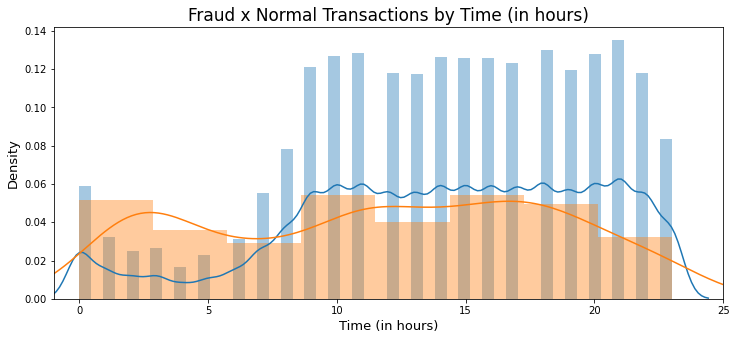

In [12]:
#Exploring the distribuition by Class types throught hours and minutes
plt.figure(figsize=(12,5))
sns.displot(df_credit[df_credit['Class'] == 0]["Time_hour"])
sns.displot(df_credit[df_credit['Class'] == 1]["Time_hour"])
plt.xlabel("Time (in hours)", fontsize=13)
plt.ylabel("Density", fontsize=13)
plt.title('Fraud x Normal Transactions by Time (in hours)', fontsize=17)
plt.xlim([-1,25])
plt.show()

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


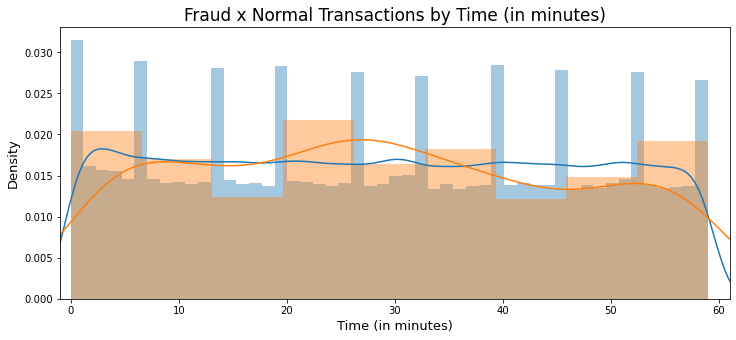

In [13]:
#Exploring the distribuition by Class types throught hours and minutes
plt.figure(figsize=(12,5))
sns.distplot(df_credit[df_credit['Class'] == 0]["Time_min"])
sns.distplot(df_credit[df_credit['Class'] == 1]["Time_min"])
plt.xlabel("Time (in minutes)", fontsize=13)
plt.ylabel("Density", fontsize=13)
plt.title('Fraud x Normal Transactions by Time (in minutes)', fontsize=17)
plt.xlim([-1,61])
plt.show()

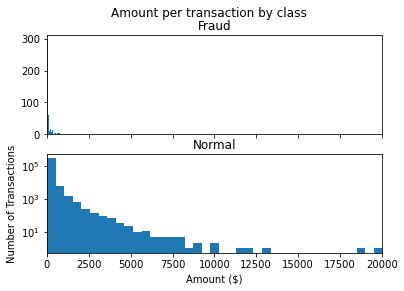

In [14]:
df_fraud = df_credit[df_credit['Class'] == 1]
df_normal = df_credit[df_credit['Class'] == 0]

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(df_fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(df_normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

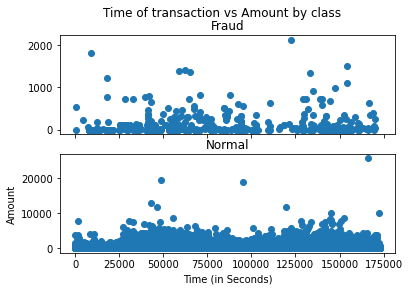

In [15]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(df_fraud.Time, df_fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(df_normal.Time, df_normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [16]:
#To describe the data of frauds and no frauds
df_fraud = df_credit[df_credit['Class'] == 1]
df_normal = df_credit[df_credit['Class'] == 0]

print("Fraud transaction statistics")
print(df_fraud["Amount"].describe())
print("\nNormal transaction statistics")
print(df_normal["Amount"].describe())

Fraud transaction statistics
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal transaction statistics
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [17]:
# Separate fraud and normal transactions
fraud_transactions = []
normal_transactions = []
for i in range(len(df_credit['Class'])):
    if df_credit['Class'][i] == 1:
        fraud_transactions.append(df_credit['Amount'][i])
    else:
        normal_transactions.append(df_credit['Amount'][i])

# Calculate statistics for fraud transactions
fraud_count = len(fraud_transactions)
fraud_total_amount = sum(fraud_transactions)
fraud_min_amount = min(fraud_transactions)
fraud_max_amount = max(fraud_transactions)
fraud_avg_amount = fraud_total_amount / fraud_count
fraud_std = (sum((x - fraud_avg_amount) ** 2 for x in fraud_transactions) / fraud_count) ** 0.5
fraud_25th_percentile = sorted(fraud_transactions)[int(len(fraud_transactions) * 0.25)]
fraud_median = sorted(fraud_transactions)[int(len(fraud_transactions) * 0.5)]
fraud_75th_percentile = sorted(fraud_transactions)[int(len(fraud_transactions) * 0.75)]

# Calculate statistics for normal transactions
normal_count = len(normal_transactions)
normal_total_amount = sum(normal_transactions)
normal_min_amount = min(normal_transactions)
normal_max_amount = max(normal_transactions)
normal_avg_amount = normal_total_amount / normal_count
normal_std = (sum((x - normal_avg_amount) ** 2 for x in normal_transactions) / normal_count) ** 0.5
normal_25th_percentile = sorted(normal_transactions)[int(len(normal_transactions) * 0.25)]
normal_median = sorted(normal_transactions)[int(len(normal_transactions) * 0.5)]
normal_75th_percentile = sorted(normal_transactions)[int(len(normal_transactions) * 0.75)]

# Print statistics
print("Fraud transaction statistics")
print("Count:", fraud_count)
print("Total Amount:", fraud_total_amount)
print("Minimum Amount:", fraud_min_amount)
print("Maximum Amount:", fraud_max_amount)
print("Average Amount:", fraud_avg_amount)
print("Standard Deviation:", fraud_std)
print("25th Percentile:", fraud_25th_percentile)
print("Median (50th Percentile):", fraud_median)
print("75th Percentile:", fraud_75th_percentile)

print("\nNormal transaction statistics")
print("Count:", normal_count)
print("Total Amount:", normal_total_amount)
print("Minimum Amount:", normal_min_amount)
print("Maximum Amount:", normal_max_amount)
print("Average Amount:", normal_avg_amount)
print("Standard Deviation:", normal_std)
print("25th Percentile:", normal_25th_percentile)
print("Median (50th Percentile):", normal_median)
print("75th Percentile:", normal_75th_percentile)


Fraud transaction statistics
Count: 492
Total Amount: 60127.96999999997
Minimum Amount: 0.0
Maximum Amount: 2125.87
Average Amount: 122.21132113821133
Standard Deviation: 256.42229861324483
25th Percentile: 1.0
Median (50th Percentile): 9.29
75th Percentile: 105.89

Normal transaction statistics
Count: 284315
Total Amount: 25102462.039983638
Minimum Amount: 0.0
Maximum Amount: 25691.16
Average Amount: 88.29102242225574
Standard Deviation: 250.1046523874637
25th Percentile: 5.65
Median (50th Percentile): 22.0
75th Percentile: 77.05


In [18]:
#Feature engineering to a better visualization of the values
df_credit['Amount_log'] = np.log(df_credit.Amount + 0.01)

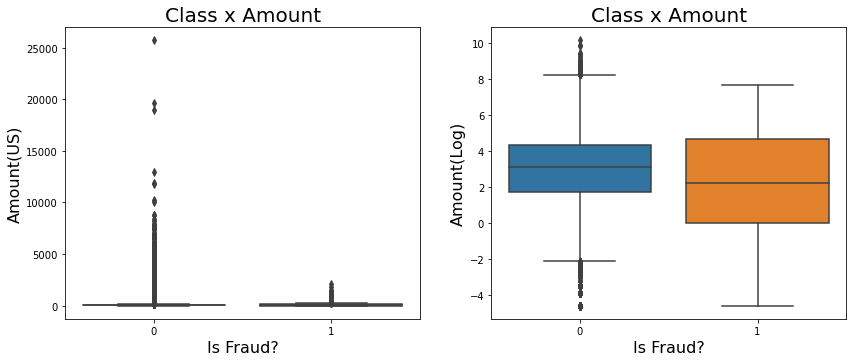

In [19]:
plt.figure(figsize=(14,6))
#I will explore the Amount by Class and see the distribuition of Amount transactions
plt.subplot(121)
ax = sns.boxplot(x ="Class",y="Amount",
                 data=df_credit)
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Is Fraud?", fontsize=16)
ax.set_ylabel("Amount(US)", fontsize = 16)

plt.subplot(122)
ax1 = sns.boxplot(x ="Class",y="Amount_log", data=df_credit)
ax1.set_title("Class x Amount", fontsize = 20)
ax1.set_xlabel("Is Fraud?", fontsize = 16)
ax1.set_ylabel("Amount(Log)", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

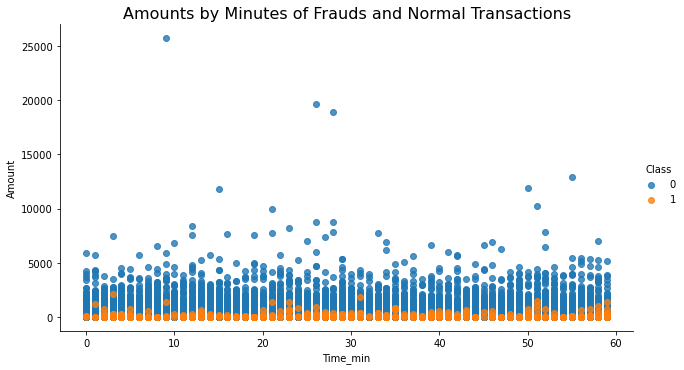

In [20]:
#Looking the Amount and time distribuition of FRAUD transactions
ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False,aspect=1.8,
                data=df_credit, hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=16)
plt.show()

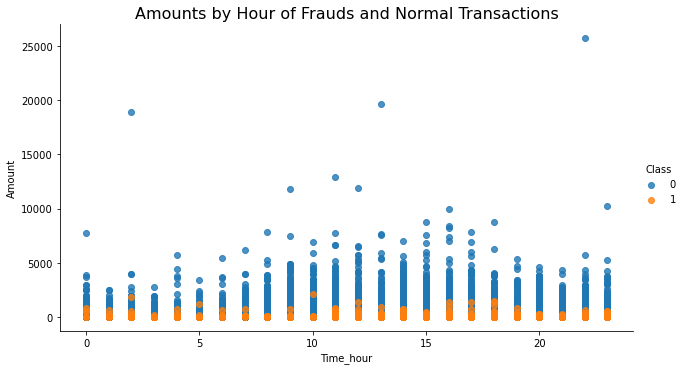

In [21]:
ax = sns.lmplot(y="Amount", x="Time_hour", fit_reg=False,aspect=1.8,
                data=df_credit, hue='Class')
plt.title("Amounts by Hour of Frauds and Normal Transactions", fontsize=16)

plt.show()

In [22]:
df_credit.Amount = np.log(df_credit.Amount + 0.001)

#Looking at the final df
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Time_min,Time_hour,Amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008105,0,0.0,0.0,5.008166
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.989913,0,0.0,0.0,0.993252
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936641,0,0.0,0.0,5.936665
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816249,0,0.0,0.0,4.816322
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248367,0,0.0,0.0,4.248495


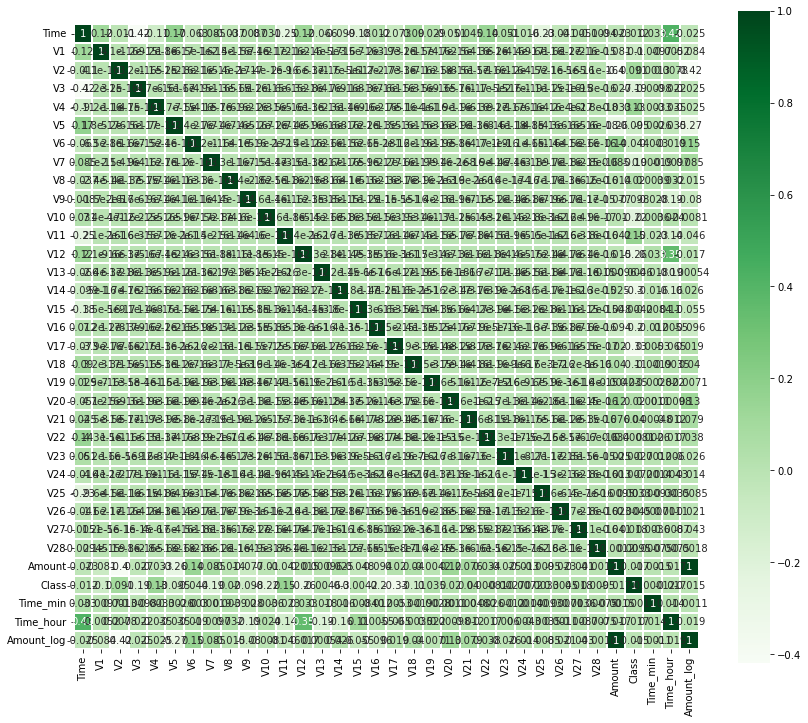

In [23]:
colormap = plt.cm.Greens

plt.figure(figsize=(14,12))

sns.heatmap(df_credit.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap = colormap, linecolor='white', annot=True)
plt.show()

In [24]:
df_credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Time_min,Time_hour,Amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008105,0,0.0,0.0,5.008166
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.989913,0,0.0,0.0,0.993252
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936641,0,0.0,0.0,5.936665
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816249,0,0.0,0.0,4.816322
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248367,0,0.0,0.0,4.248495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.260067,0,59.0,23.0,-0.248461
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,3.210481,0,59.0,23.0,3.210844
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.640134,0.265745,-0.087371,0.004455,-0.026561,4.217756,0,59.0,23.0,4.217889
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.123205,-0.569159,0.546668,0.108821,0.104533,2.302685,0,59.0,23.0,2.303585
